In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [2]:
df=pd.read_csv(r"C:\Users\AMON\Desktop\archive (1).zip")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
df.drop(columns=['Unnamed: 32'], inplace=True)

In [5]:
df=df.drop(columns=['id'])

In [6]:
selected_features = [
    

    'texture_worst', 'area_se', 'area_worst', 'texture_mean', 'compactness_se',
    'symmetry_worst', 'concavity_worst', 'concave points_worst', 'smoothness_worst', 
    'smoothness_mean','symmetry_se','radius_worst','concavity_mean','area_mean','concave points_se'
 

]

In [7]:
# m=malignant concerous
# b=benign non cancerous
df['status']=df['diagnosis'].map({'M':1,'B':0})
X=df[selected_features]
y=df['status']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
model=XGBClassifier(use_label_encoder=False,eval_metric='logloss')
model.fit(X_train_scaled,y_train)

C:\Users\AMON\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [18:15:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

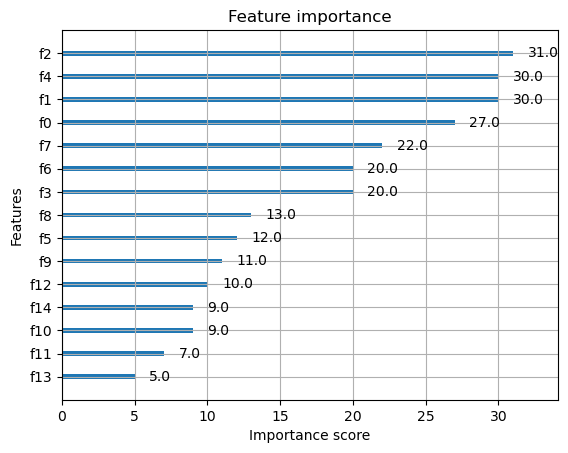

In [10]:
from xgboost import plot_importance
plot_importance(model)

In [11]:
#evaluation
y_pred=model.predict(X_test_scaled)

print("Acuuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))

Acuuracy 0.956140350877193
Precision 0.9523809523809523
Recall 0.9302325581395349


In [12]:
import joblib
joblib.dump(model,'disease_detection.pkl') # save the model to a file
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [ ]:
from flask import Flask,request,jsonify,render_template
import numpy as np
import joblib 
model=joblib.load('disease_detection.pkl')
scaler=joblib.load('scaler.pkl')


feature_names = [
    

    'texture_worst', 'area_se', 'area_worst', 'texture_mean', 'compactness_se',
    'symmetry_worst', 'concavity_worst', 'concave points_worst', 'smoothness_worst', 
    'smoothness_mean','symmetry_se','radius_worst','concavity_mean','area_mean','concave points_se'
 

]


app=Flask(__name__)
@app.route('/')
def home():
    return render_template('index.html')


@app.route('/prediction',methods=['POST'])
def prediction():
    data=request.get_json()
    try:
        input_data=[float(data[feature])
 for feature in feature_names]
    except KeyError as e:
        return jsonify ({'error':f'Missing feature:{e.args[0]}'}),400
    except ValueError as e:
        return jsonify({'error':f'Invalid value for feature:{str(e)}'}),400
        
    features=np.array(input_data).reshape(1,-1)
    feature_scaled=scaler.transform(features)
    prediction=model.predict(feature_scaled)[0]
    result="Positive" if prediction==1 else "Negative"
    return jsonify({'prediction': int(prediction), 'result': result})
    



if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Jul/2025 18:16:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2025 18:16:21] "GET /favicon.ico HTTP/1.1" 404 -
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [24/Jul/2025 18:29:44] "POST /prediction HTTP/1.1" 200 -
127.0.0.1 - - [24/Jul/2025 18:30:05] "GET / HTTP/1.1" 200 -
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
127.0.0.1 - - [24/Jul/2025 18:35:59] "POST /prediction HTTP/1.1" 200 -


In [40]:
python test_app.py



SyntaxError: invalid syntax (1957662778.py, line 1)

In [62]:
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'status'],
      dtype='object')
